In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)
np.random.seed(1)

In [2]:
def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    X=data_set.x.numpy()
    y=data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _,yhat=torch.max(model(XX),1)
    yhat=yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:]==0,0], X[y[:]==0,1], 'ro', label='y=0')
    plt.plot(X[y[:]==1,0], X[y[:]==1,1], 'go', label='y=1')
    plt.plot(X[y[:]==2,0], X[y[:]==2,1], 'o', label='y=2')
    plt.title("decision region")
    plt.legend()

In [23]:
class Data(Dataset):
    def __init__(self, k = 3, n = 500):
        d = 2
        x_ = np.zeros((n * k, d))
        y_ = np.zeros(n * k, dtype = 'uint8')
        for j in range(k):
            ix = range(n * j, n * (j + 1))
            r = np.linspace(0.0, 1, n)
            t = np.linspace(j * 4, (j + 1) * 4, n) + np.random.randn(n) * 0.2
            x_[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
            y_[ix] = j
        self.y = torch.from_numpy(y_).type(torch.LongTensor)
        self.x = torch.from_numpy(x_).type(torch.FloatTensor)
        self.len = y_.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
    def plot_data(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y=1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2, 1].numpy(), 'go',label="y=2")
        plt.legend()

In [28]:
class Net(nn.Module):
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
    def forward(self, activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [35]:
def train(datset, model, criterion, train_loader, optimizer, epochs = 100):
    losses = []
    acc = []
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            y_hat = model(x)
            loss = criterion(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        losses.append(loss.item())
        acc.append(accuracy(model, dataset))
    results = {'loss': losses, 'accuracy': acc}
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(losses,color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis = 'y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(acc, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()
    return results

In [19]:
def accuracy(model, datset):
    _, y_hat = torch.max(model(dataset.x), 1)
    return (y_hat == dataset.y).numpy().mean()

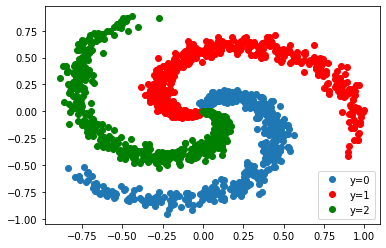

In [78]:
dataset = Data()
dataset.plot_data()
dataset.y = dataset.y.view(-1)

In [79]:
results = {"momentum 0": {"loss": 0, "accuracy": 0}, "momentum 0.1": {"loss": 0, "accuracy": 0}}

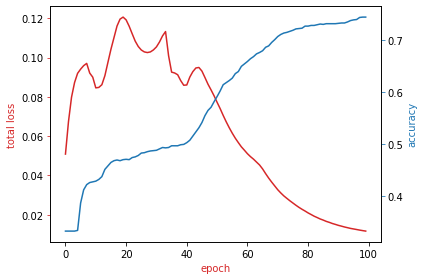

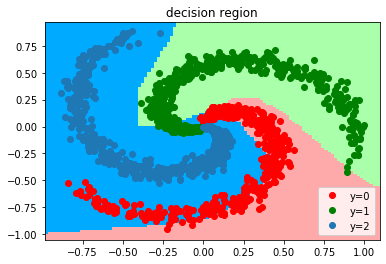

In [80]:
layers = [2, 50, 3]
model = Net(layers)
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = dataset, batch_size = 20)
criterion = nn.CrossEntropyLoss()
results['momentum 0'] = train(dataset, model, criterion, train_loader, optimizer, epochs = 100)
plot_decision_regions_3class(model, dataset)

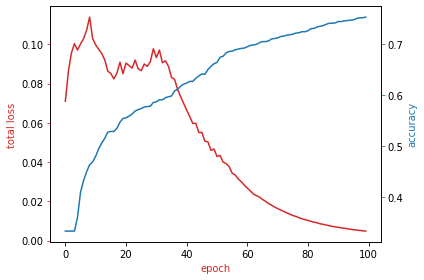

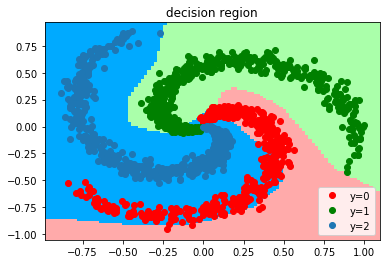

In [81]:

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)
train_loader = DataLoader(dataset=dataset, batch_size=20)
criterion = nn.CrossEntropyLoss()
results["momentum 0.1"] = train(dataset, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model, dataset)

In [ ]:
Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.2)
train_loader = DataLoader(dataset=dataset, batch_size=20)
criterion = nn.CrossEntropyLoss()
results["momentum 0.2"] = train(dataset, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model, dataset)

In [ ]:
Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.4)
train_loader = DataLoader(dataset=dataset, batch_size=20)
criterion = nn.CrossEntropyLoss()
results["momentum 0.4"] = train(dataset, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model, dataset)

In [ ]:
# Train a model with 1 hidden layer and 50 neurons with 0.5 momentum

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
train_loader = DataLoader(dataset=dataset, batch_size=20)
criterion = nn.CrossEntropyLoss()
results["momentum 0.5"] = train(dataset, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model,dataset)

In [ ]:
for key, value in results.items():
    plt.plot(value['loss'], label = key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('total loss or cost')

In [ ]:
for key, value in results.items():
    plt.plot(value['accuracy'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')